<Axes: >

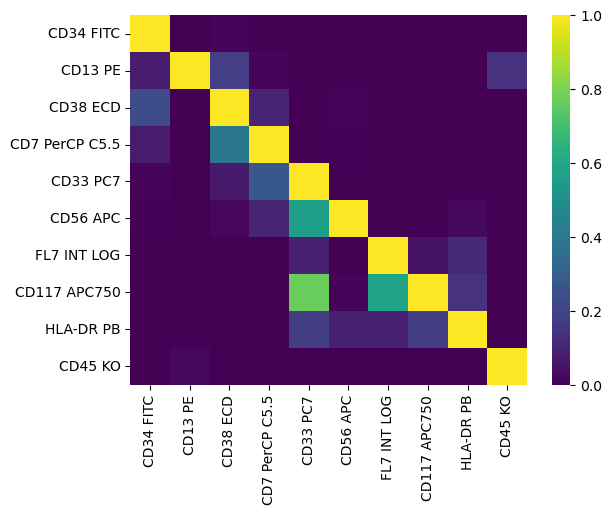

In [ ]:
from bokeh.io import show
from pathlib import Path

import flowkit as fk
import seaborn as sns
import pandas as pd

def load_sample(subject_id, data_dir):
    data_path = Path(data_dir)
    sample = fk.Sample(
        data_path / subject_id / f"{subject_id}_sample.fcs",
        sample_id=subject_id
    )
    # Correct channel idx issues
    if sample.pnn_labels[0]=='FS PEAK':
        sample.fluoro_indices=[3,4,5,6,7,8,9,10,11,12]
        sample.scatter_indices=[1,2]
    else:
        sample.fluoro_indices=[2,3,4,5,6,7,8,9,10,11]
        sample.scatter_indices=[0,1]

    detectors = [sample.pnn_labels[i] for i in sample.fluoro_indices]
    fluorochromes = [sample.pns_labels[i] for i in sample.fluoro_indices]
    mat = pd.read_csv(
        data_path / subject_id / (subject_id + "_compensation.csv"),
        index_col=0
    )
    sample.compensation = fk.Matrix(
        mat.values,
        detectors=detectors,
        fluorochromes=fluorochromes
    )
    sample.apply_compensation(sample.compensation)
    return sample

    
sample = load_sample(
    "sub-",
    "debug_output"
)
xform = fk.transforms.AsinhTransform(
    param_t=5, param_m=1, param_a=1
)
sample.apply_transform(xform)
sns.heatmap(
    sample.compensation.as_dataframe(fluoro_labels=True),
    cmap="viridis"
)

In [5]:
p = sample.plot_scatter_matrix(source="xform")
show(p)

In [19]:
lmap = {
    key: value for key, value in zip(sample.pns_labels, sample.pnn_labels)
}

In [20]:
sample.pns_labels

['FS INT LIN',
 'SS INT LIN',
 'CD34 FITC',
 'CD13 PE',
 'CD38 ECD',
 'CD7 PerCP C5.5',
 'CD33 PC7',
 'CD56 APC',
 'FL7 INT LOG',
 'CD117 APC750',
 'HLA-DR PB',
 'CD45 KO',
 'TIME',
 'FS TOF LIN',
 'SS PEAK LIN',
 'SS TOF LIN']

In [21]:
p = sample.plot_scatter(lmap["CD7 PerCP C5.5"], lmap["CD33 PC7"])
show(p)
p = sample.plot_scatter(
    lmap["FL7 INT LOG"],
    lmap["CD7 PerCP C5.5"],
    source="comp"
)
show(p)

In [22]:
sample.get_metadata()

{'beginanalysis': '0',
 'begindata': '1574',
 'beginstext': '0',
 'byteord': '1,2,3,4',
 'datatype': 'F',
 'endanalysis': '0',
 'enddata': '10578149',
 'endstext': '0',
 'mode': 'L',
 'nextdata': '0',
 'par': '16',
 'tot': '165259',
 'p1b': '32',
 'p1e': '0,0',
 'p1g': '1.0',
 'p1r': '262144',
 'p1n': 'FS INT LIN',
 'p1s': 'FS INT LIN',
 'p2b': '32',
 'p2e': '0,0',
 'p2g': '1.0',
 'p2r': '262144',
 'p2n': 'SS INT LIN',
 'p2s': 'SS INT LIN',
 'p3b': '32',
 'p3e': '0,0',
 'p3g': '1.0',
 'p3r': '262144',
 'p3n': 'FL1 INT LOG',
 'p3s': 'CD34 FITC',
 'p4b': '32',
 'p4e': '0,0',
 'p4g': '1.0',
 'p4r': '262144',
 'p4n': 'FL2 INT LOG',
 'p4s': 'CD13 PE',
 'p5b': '32',
 'p5e': '0,0',
 'p5g': '1.0',
 'p5r': '262144',
 'p5n': 'FL3 INT LOG',
 'p5s': 'CD38 ECD',
 'p6b': '32',
 'p6e': '0,0',
 'p6g': '1.0',
 'p6r': '262144',
 'p6n': 'FL4 INT LOG',
 'p6s': 'CD7 PerCP C5.5',
 'p7b': '32',
 'p7e': '0,0',
 'p7g': '1.0',
 'p7r': '262144',
 'p7n': 'FL5 INT LOG',
 'p7s': 'CD33 PC7',
 'p8b': '32',
 'p8e': '0